In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#CountVectorizer :  for converting the corpus into DTM

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords

from sklearn.naive_bayes import BernoulliNB , GaussianNB , MultinomialNB
from sklearn.metrics import confusion_matrix  , accuracy_score , classification_report

In [138]:
#importing dataset

dd = pd.read_csv(r"D:\2 . Data Science\My Studies\ML\Naive Bayes\Text Classification\email.csv")

In [139]:
dd.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [140]:
# check info 

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [141]:
dd['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [142]:
dd = dd[dd['Category'] != '{"mode":"full"']

<Axes: xlabel='Category', ylabel='Count'>

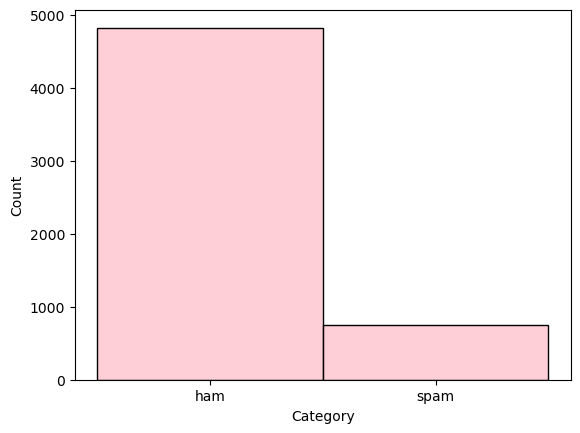

In [143]:
# Dataset Inspection 

sns.histplot(dd['Category'] ,  color = 'pink')

In [144]:
#separating the data into labels and content 

y = dd['Category']
X = dd['Message']

In [145]:
# Splitting the data into training and testing sets

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.2 , random_state= 123)

In [146]:
# creating a function to clean the labels ; convert them into binary : 0 / 1

def clean_label(y):
    return np.where( y == 'spam' , 1 , 0 )

y_train_clean =  clean_label(y_train)
y_test_clean =  clean_label(y_test)

In [147]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Load the English stopwords
stopwords = stopwords.words('english')

# Print the stopwords
print(stopwords)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
# initialize a countervectorizer object 

vect = CountVectorizer(min_df = 20 , max_df = 100 , stop_words= stopwords)

In [149]:
# fit the vectorizer to training data

vect.fit(X_train)

CountVectorizer(max_df=100, min_df=20,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [150]:
# transform both the train and test data using the vectorizer ( the output are numpy arrays and not dataframes)

In [151]:
X_train_transformed = vect.transform(X_train).toarray()
X_test_transformed = vect.transform(X_test).toarray()

In [152]:
X_train_transformed.shape

(4457, 325)

In [153]:
X_test_transformed.shape

(1115, 325)

In [154]:
# get the feature names

X_df = pd.DataFrame(X_train_transformed , columns= vect.get_feature_names_out())

In [155]:
# check the shape and iteratively try to reduce the number of features using Countvectorizer arguments

X_df.sum().sort_values(ascending = False).iloc[0:50]

pls         104
mobile      104
phone       102
week        102
well        101
new         100
hi           99
dear         96
oh           94
hey          92
hope         92
happy        89
great        88
msg          88
claim        85
wat          84
night        84
make         83
much         81
number       80
give         79
message      79
work         79
prize        78
yes          77
way          77
already      76
tomorrow     76
www          75
ask          75
cash         72
right        72
say          71
meet         70
said         70
really       68
miss         67
yeah         66
im           65
amp          65
also         64
win          64
morning      64
thanks       64
find         64
babe         63
cos          62
anything     61
would        60
life         60
dtype: int64

In [156]:
# Top 20 spam words 

X_df.loc[y_train_clean == 1].sum().sort_values(ascending = False).iloc[:20]

mobile        92
claim         85
prize         78
www           73
cash          60
150p          58
new           57
uk            57
win           52
urgent        50
nokia         50
50            48
week          46
tone          44
contact       44
16            43
msg           41
com           41
guaranteed    41
co            40
dtype: int64

In [157]:
# Top 20 ham words

X_df.loc[y_train_clean == 0].sum().sort_values(ascending = False).iloc[:20]

well       97
oh         94
pls        93
hope       89
hey        88
happy      88
hi         85
wat        84
dear       84
night      80
much       80
great      79
work       77
way        77
ask        75
already    75
make       74
give       73
said       70
say        70
dtype: int64

In [158]:
# building the Gaussian Naive Bayes model
#instantiate 

model1 = GaussianNB()
model1.fit(X_train_transformed , y_train_clean)

GaussianNB()

In [159]:
train_pred = model1.predict(X_train_transformed)
test_pred = model1.predict(X_test_transformed)

In [160]:
# evaluating the model

In [161]:
# training accuracy 

accuracy_score(y_train_clean , train_pred)

0.5938972402961633

In [162]:
# test accuracy 

accuracy_score(y_test_clean , test_pred)

0.5865470852017938

In [163]:
# confusion matrix 

confusion_matrix(y_train_clean , train_pred)
                                                                  

array([[2054, 1809],
       [   1,  593]], dtype=int64)

In [164]:
# confusion matrix 

confusion_matrix(y_test_clean , test_pred)
                                                                  

array([[506, 456],
       [  5, 148]], dtype=int64)

In [165]:
# building the Bernoulli Naive Bayes model
#instantiate 

model1 = BernoulliNB()
model1.fit(X_train_transformed , y_train)

BernoulliNB()

In [166]:
train_pred = model1.predict(X_train_transformed)
test_pred = model1.predict(X_test_transformed)

In [167]:
# evaluating the model

In [168]:
# training accuracy 

accuracy_score(y_train , train_pred)

0.9771146511106125

In [169]:
# test accuracy 

accuracy_score(y_test , test_pred)

0.9730941704035875

In [170]:
# confusion matrix 

confusion_matrix(y_train , train_pred)
                                                                  

array([[3846,   17],
       [  85,  509]], dtype=int64)

In [171]:
# confusion matrix 

confusion_matrix(y_test , test_pred)
                                                                  

array([[955,   7],
       [ 23, 130]], dtype=int64)

In [179]:
# building the Multinomial Naive Bayes model
# instantiate 

model3  = MultinomialNB()
model3.fit(X_train_transformed , y_train)

MultinomialNB()

In [173]:
train_pred = model3.predict(X_train_transformed)
test_pred = model3.predict(X_test_transformed)

In [174]:
# evaluating the model

In [175]:
# training accuracy 

accuracy_score(y_train , train_pred)

0.9728516939645502

In [176]:
# test accuracy 

accuracy_score(y_test , test_pred)

0.9721973094170404

In [177]:
# confusion matrix 

confusion_matrix(y_train , train_pred)
                                                                  

array([[3815,   48],
       [  73,  521]], dtype=int64)

In [178]:
# confusion matrix 

confusion_matrix(y_test , test_pred)
                                                                  

array([[949,  13],
       [ 18, 135]], dtype=int64)